# "VAE颗粒" 与 "GAN颗粒" 的特征比较

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')
sns.set(font_scale=1.3)
sns.set_style({"font.family": "Monospace"})

from particle.utils.plotter import Violin

## 颗粒几何特征
- volume 体积
- surface 表面积
- radius 等效球半径
- sphericity 球度
- EI, FI 伸长率、扁平率
- convexity 凸度
- angularity 棱角度
- roughness 粗糙度

In [2]:
real = np.load('output/geometry/trainSet.npz')
vae = np.load('output/vae/nLatent64/geometry/vae.npz')
gan = np.load('output/dcgan/iterD:iterG=1:2/nLatent64/geometry/gan-25.npz')
# test = np.load('output/geometry/test.npz')

print(real['surface'].shape, vae['surface'].shape, gan['surface'].shape)

violin = Violin((real, vae, gan), ('real', 'vae', 'gan'))
kwargs = {"inner":"quartile"}

(27107,) (2999,) (2998,)


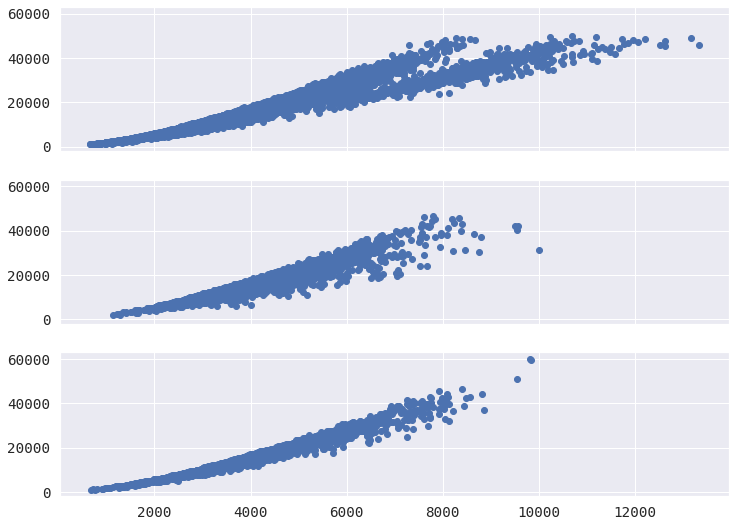

In [3]:
fig, ax = plt.subplots(3, sharex=True, sharey=True, figsize=(12,9))
ax[0].plot(real['surface'], real['volume'], 'o')
ax[1].plot(vae['surface'], vae['volume'], 'o')
ax[2].plot(gan['surface'], gan['volume'], 'o')
# ax[3].plot(test['surface'], test['volume'], 'o')

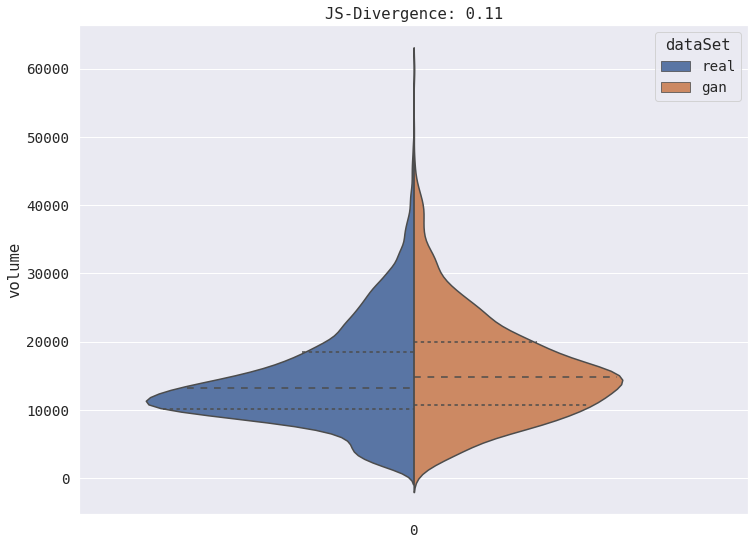

In [4]:
violin.plot(feature='volume', setName=("real", "gan"), figsize=(12, 9), **kwargs);
plt.savefig('/home/chuan/volume.png')

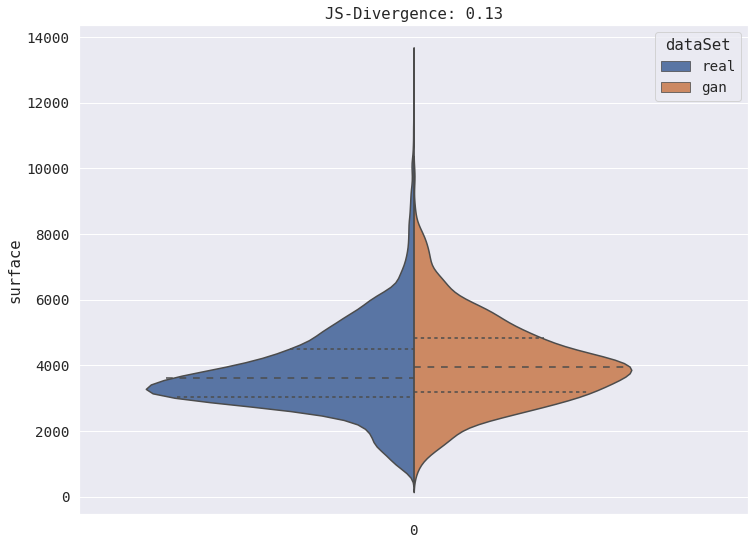

In [5]:
violin.plot(feature='surface', setName=("real", "gan"), figsize=(12, 9), **kwargs);
plt.savefig('/home/chuan/surface.png')

## 以下为形状参数

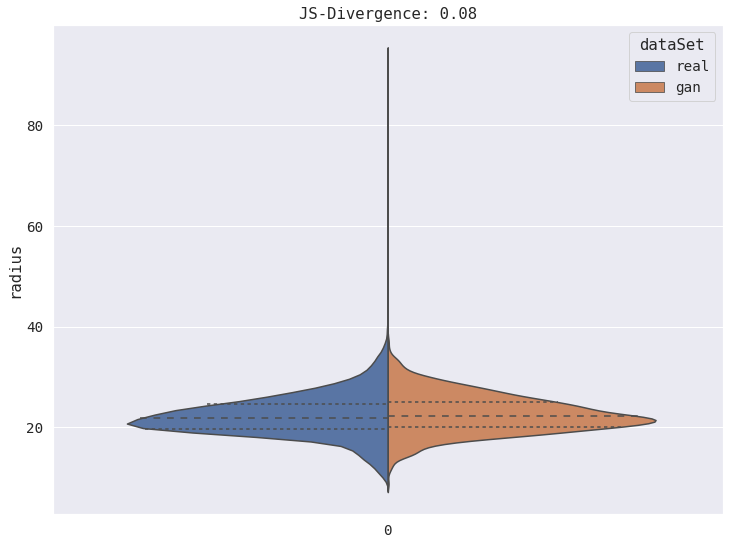

In [6]:
violin.plot(feature='radius', setName=("real", "gan"), figsize=(12, 9), **kwargs);
plt.savefig('/home/chuan/radius.png')

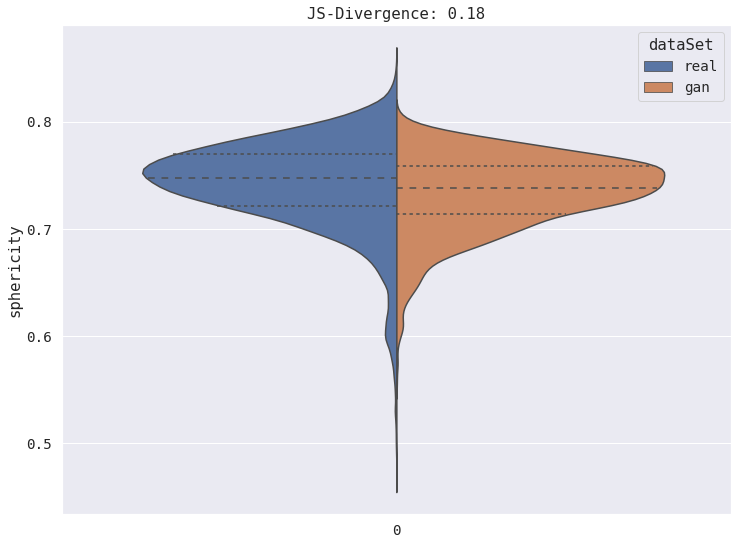

In [7]:
violin.plot(feature='sphericity', setName=("real", "gan"), figsize=(12, 9), **kwargs);
plt.savefig('/home/chuan/sphericity.png')

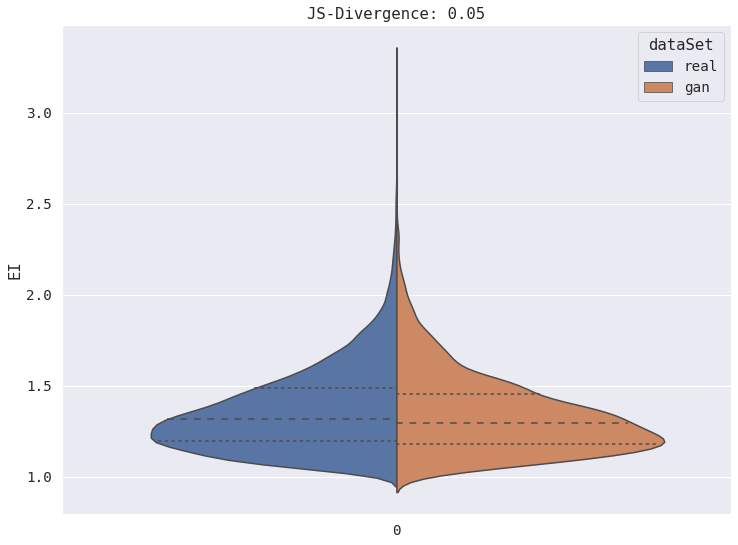

In [8]:
violin.plot(feature='EI', setName=("real", "gan"), figsize=(12, 9), **kwargs);
plt.savefig('/home/chuan/EI.png')

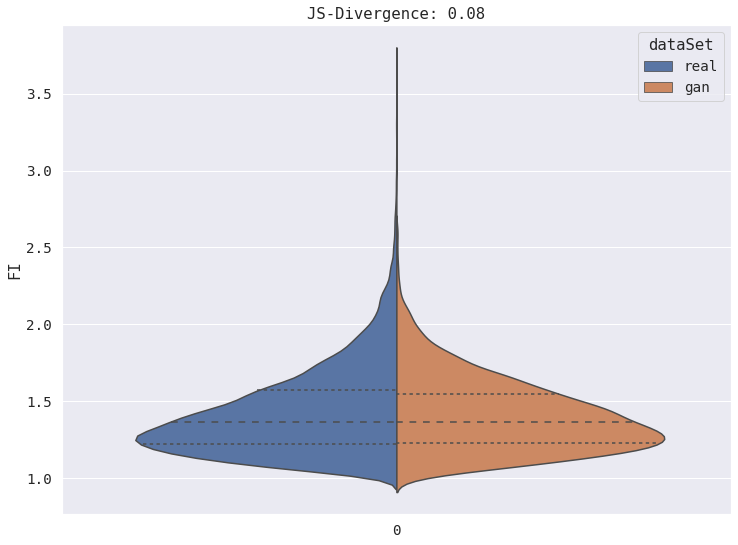

In [9]:
violin.plot(feature='FI', setName=("real", "gan"), figsize=(12, 9), **kwargs);
plt.savefig('/home/chuan/FI.png')

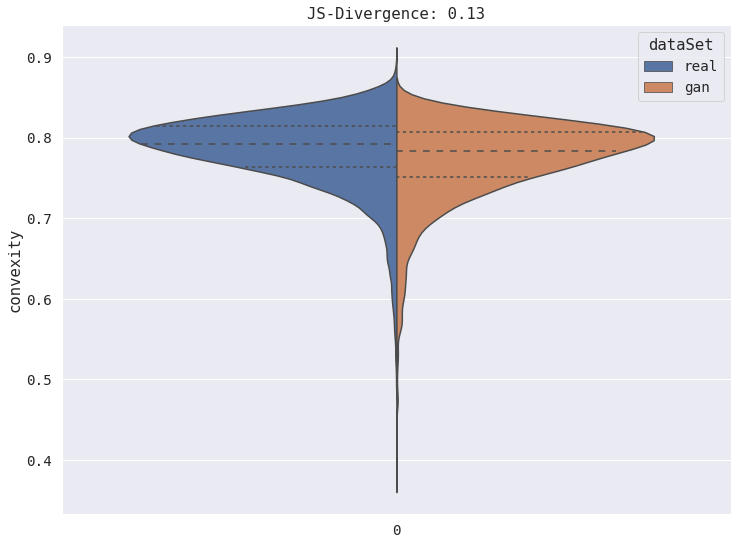

In [10]:
violin.plot(feature='convexity', setName=("real", "gan"), figsize=(12, 9), **kwargs);
plt.savefig('/home/chuan/convexity.png')

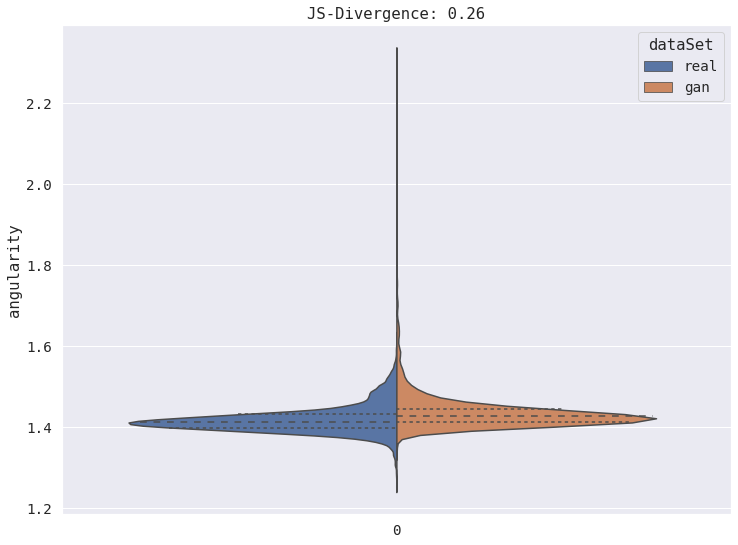

In [11]:
violin.plot(feature='angularity', setName=("real", "gan"), figsize=(12, 9), **kwargs);
plt.savefig('/home/chuan/angularity.png')

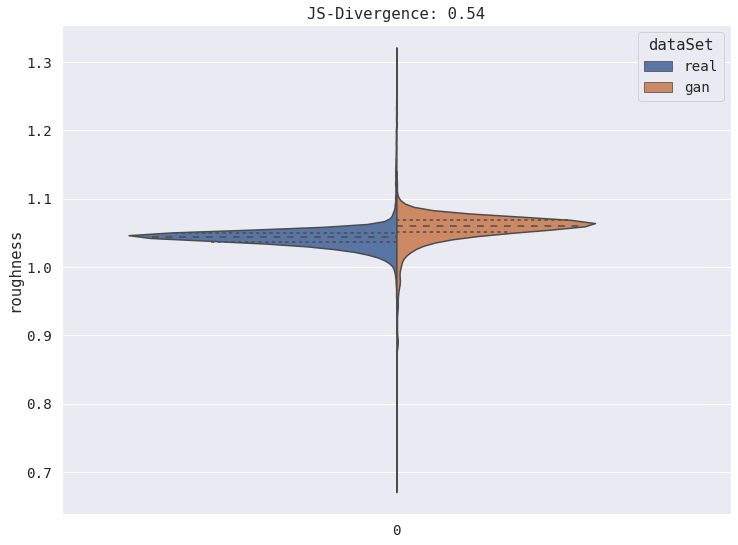

In [12]:
violin.plot(feature='roughness', setName=("real", "gan"), figsize=(12, 9), **kwargs);
plt.savefig('/home/chuan/roughness.png')